<center>
<a href="http://www.udem.edu.co/"><img src="Escudo.png"></a>
<h1>Taller - Reconocimiento de Patrones I</h1>
<h3>2018-2</h3>
</center>

# Taller

### K-means, Random Forests, medidas de error y metodologías de validación

### Universidad de Medellín

### Facultad de Ingenierías

### Ingeniería de Sistemas

### UdeM - 2018-II

#### Profesor: Antonio Tamayo Herrera

## Guía del Taller

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el Taller.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al método KMeans de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Este ejercicio busca descubrir grupos (Clustering, aprendizaje no supervisado) de muestras similares dentro de la base de datos de entrenamiento IRIS que hemos venido trabajando.

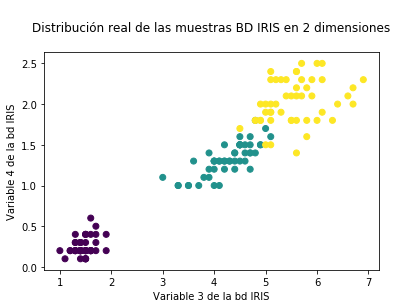



Descubriendo las clases con el método kMeans


Descubriendo 1 clusters:



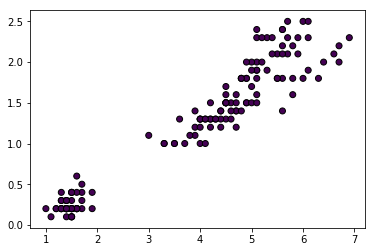

Descubriendo 2 clusters:



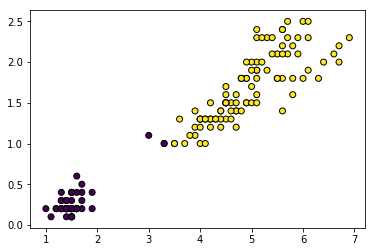

Descubriendo 3 clusters:



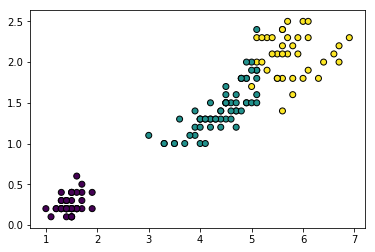

Descubriendo 4 clusters:



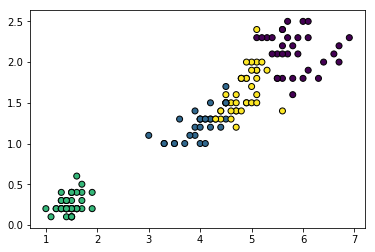

Descubriendo 5 clusters:



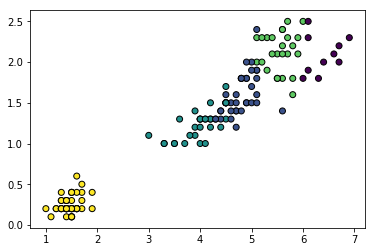

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:,2], X[:,3], c=y)
plt.title(u'\nDistribución real de las muestras BD IRIS en 2 dimensiones\n')
plt.xlabel('Variable 3 de la bd IRIS')
plt.ylabel('Variable 4 de la bd IRIS')
plt.show()

print('\n\nDescubriendo las clases con el método kMeans\n\n')

for k in range(1,6,1):
    
    print('Descubriendo ' + str(k) + ' clusters:\n')
    #Complete el código llamando al método KMeans usando inicialización de los centroides de manera aleatoria
    #usando las muestras de entrenamiento, tal como lo explicamos en clase. Use el algorímo EM para el
    #Entrenamiento
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='full').fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float), edgecolor='k')
    plt.show()
    

1.1 Seg&uacute;n los resultados encontrados y la base de datos usada, cu&aacute;l es el n&uacute;mero de clusters &oacute;ptimo para este problema? Argumente por qu&eacute;.

Responda aquí: 2

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo Random Forests para clasificación de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return err/np.size(y_est)


iris = datasets.load_iris()

X = iris.data
Y = iris.target

Errores = np.zeros(10)
j = 0

#Aplicando Cross-validation con 10 folds

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  


    #Complete el código aquí creado el modelo Random Forest para clasificar y entrenandolo solo con las muestras
    #para entrenamiento de la base de datos IRIS
    clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
    clf.fit(X_train, y_train)

    #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
    Y_est = clf.predict(X_test)
    
    Errores[j] = classification_error(Y_est, y_test)
    j += 1
    

    cf = confusion_matrix(y_test, Y_est)
    print (cf)
    #print y_test
    #print Y_est

print "accuracy: " + str(1-np.mean(Errores))
#Graficar la matriz de confusión (consultar)

[[15]]
[[15]]
[[15]]
[[ 5  0]
 [ 0 10]]
[[14  1]
 [ 0  0]]
[[13  2]
 [ 0  0]]
[[10  0]
 [ 0  5]]
[[ 0  0]
 [ 2 13]]
[[ 0  0]
 [ 3 12]]
[[ 0  0]
 [ 1 14]]
accuracy: 0.94


2.1 La base de datos trabajada es para un problema biclase o multiclase?

R/: Es una bd multiclase, pero debe trabajarse como un problema biclase.


2.2 Escribir el código para mostrar las medidas de errro vistas en clase. Si el problema es multiclase mostrar la matriz de confusión y analizarla. Luego, convertirlo en un problema biclase (o cargar una base de datos biclase desde el <a href="https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table">UCI Respository</a>) y mostrar la sensibilidad y especificidad del modelo. 

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [79]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

# Dividir los datos en 2 clases
x_01 = X[0:99]
x_12 = X[50:149]
x_02 = X[0:49] + X[100:149]

dicc_x = {0:x_01,1:x_12,2:x_02}
dicc_y = {0:Y[0:99],1:Y[50:149],2:Y[0:49] + Y[100:149]}

# Entrenar y validar
kf = KFold(n_splits=10)

for i in range(3):
    x = dicc[i]
    print('Para la clase {}'.format(i))
    for train_index, test_index in kf.split(x):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = Y[train_index], Y[test_index]  


        #Complete el código aquí creado el modelo Random Forest para clasificar y entrenandolo solo con las muestras
        #para entrenamiento de la base de datos IRIS
        clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
        clf.fit(X_train, y_train)

        #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
        Y_est = clf.predict(X_test)

        cf = confusion_matrix(y_test, Y_est)
        print (cf)
        #print y_test
        #print Y_est


Para la clase 0
[[10]]
[[10]]
[[10]]
[[10]]
[[10]]
[[10]]
[[10]]
[[10]]
[[10]]
[[9]]
Para la clase 1
[[10]]
[[10]]
[[8 2]
 [0 0]]
[[9 1]
 [0 0]]
[[10]]
[[0 0]
 [1 9]]
[[0 0]
 [1 9]]
[[0 0]
 [1 9]]
[[0 0]
 [2 8]]
[[9]]
Para la clase 2
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[5]]
[[4]]


In [ ]:
def sensibilidad():
    